## 讀取 txt 檔
* 請讀取 [text file](https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt)
* 懶人複製連結: https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt

### Hints: 使用 [Request](https://blog.gtwang.org/programming/python-requests-module-tutorial/) 抓取資料
### Hints: [字串分割](http://www.runoob.com/python/att-string-split.html)
### Hints: 例外處理: [Try-Except](https://pydoing.blogspot.com/2011/01/python-try.html)

# [作業目標]
- 試著讀取網頁上的圖片連結清單, 再以清單中網址讀取圖片

# [作業重點]
- 從網頁上讀取連結清單 (In[1], In[2])
- 從清單網址讀取圖片 (In[6]~In[9], Out[6]~Out[9])

In [121]:
import pandas as pd
## 假如我們不想把資料載到自己的電腦裡?
# 把連結填入
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

target_url = "https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt"
data0_df = pd.read_table(target_url,header=None,encoding='utf-8',sep='	')
data0_df

,0,1
0,n00015388_157,http://farm1.static.flickr.com/145/430300483_2...
1,n00015388_238,http://farm2.static.flickr.com/1005/3352960681...
2,n00015388_304,http://farm1.static.flickr.com/27/51009336_a96...
3,n00015388_327,http://farm4.static.flickr.com/3025/2444687979...
4,n00015388_355,http://img100.imageshack.us/img100/3253/forres...
...,...,...
9990,n00433802_5197,http://grfx.cstv.com/photos/schools/afa/sports...
9991,n00433802_5202,http://farm2.static.flickr.com/1130/960179413_...
9992,n00433802_5204,http://static.flickr.com/150/387324732_f8149d0...
9993,n00433802_5208,http://3.bp.blogspot.com/_9T2cRtlgHV0/SK55RHay...


In [29]:
import requests
response = requests.get(target_url)
data = response.text

# 用 request 傳送回來的資料不會認得斷行符號
print(len(data))
data[0:100]

784594


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg\nn00015388_238\thttp://farm2'

In [31]:
# 找到換行符號，用該符號做字串分割後，把它拿掉
split_tag = "\n"

data = data.replace("\t"," ")
data =data.split(split_tag)
print(len(data))
data[0]

9996


'n00015388_157 http://farm1.static.flickr.com/145/430300483_21e993670c.jpg'

## 將 txt 轉成 pandas dataframe

In [57]:
import pandas as pd

data_df = pd.read_table("./imagenet_urls_examples.txt",header=None,encoding='utf-8',sep='	')
data_df.rename(columns={1:'link'},inplace=True)
data_df

,0,link
0,n00015388_157,http://farm1.static.flickr.com/145/430300483_2...
1,n00015388_238,http://farm2.static.flickr.com/1005/3352960681...
2,n00015388_304,http://farm1.static.flickr.com/27/51009336_a96...
3,n00015388_327,http://farm4.static.flickr.com/3025/2444687979...
4,n00015388_355,http://img100.imageshack.us/img100/3253/forres...
...,...,...
9990,n00433802_5197,http://grfx.cstv.com/photos/schools/afa/sports...
9991,n00433802_5202,http://farm2.static.flickr.com/1130/960179413_...
9992,n00433802_5204,http://static.flickr.com/150/387324732_f8149d0...
9993,n00433802_5208,http://3.bp.blogspot.com/_9T2cRtlgHV0/SK55RHay...


## 讀取圖片，請讀取上面 data frame 中的前 5 張圖片

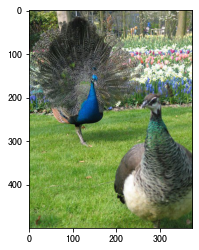

In [111]:
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

# 請用 df.loc[...] 得到第一筆資料的連結
first_link = data_df.loc[2,"link"]

response = requests.get(first_link)
img = Image.open(BytesIO(response.content))

# Convert img to numpy array

plt.imshow(img)
plt.show()

In [125]:
def img2arr_fromURLs(url_list, resize = False):
    """
    請完成這個 Function
    Args
        - url_list: list of URLs
        - resize: bool
    Return
        - list of array
    """
    img_list=[]
    for url in url_list:
        print(url)
        try:
            response = requests.get(url)
            img = Image.open(BytesIO(response.content))
            img_list.append(img)
        except:
            img_list.append(None)
    return img_list

In [112]:
list(data_df["link"][0:4].values)

['http://farm1.static.flickr.com/145/430300483_21e993670c.jpg',
 'http://farm2.static.flickr.com/1005/3352960681_37b9c1d27b.jpg',
 'http://farm1.static.flickr.com/27/51009336_a9663af3dd.jpg',
 'http://farm4.static.flickr.com/3025/2444687979_bf7bc8df21.jpg']

http://farm1.static.flickr.com/145/430300483_21e993670c.jpg
http://farm2.static.flickr.com/1005/3352960681_37b9c1d27b.jpg
http://farm1.static.flickr.com/27/51009336_a9663af3dd.jpg
http://farm4.static.flickr.com/3025/2444687979_bf7bc8df21.jpg
http://img100.imageshack.us/img100/3253/forrest004fs9.jpg
Total images that we got: 5 


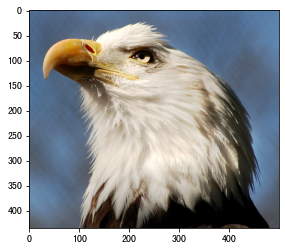

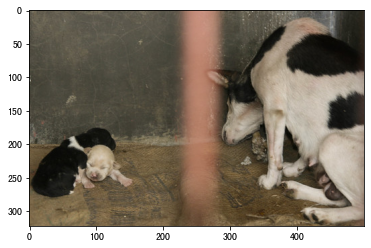

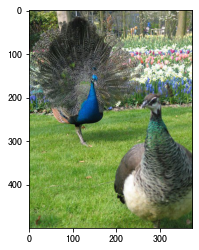

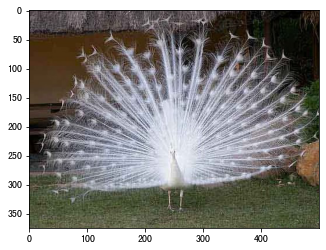

In [126]:
result = img2arr_fromURLs(list(data_df["link"][0:5].values)) #第五個連結失效
print("Total images that we got: %i " % len(result)) # 如果不等於 5, 代表有些連結失效囉

for im_get in result:
    if im_get !=None:
        plt.imshow(im_get)
        plt.show()